<a href="https://colab.research.google.com/github/erny123/HW/blob/main/Plasma3_Last_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ernesto Barraza-Valdez

#Plasma 3-HW 9


---



#1a)

Given $\omega_0$ we can write down the 5 equations for a parametric system: 

Manley Rowe:

$\omega_0 = \omega_1 + \omega_2 $

$\vec{k}_0 = \vec{k}_1 + \vec{k}_2 $

Dispersions:

$\omega_0^2 = \omega_p^2 + c^2 k_0^2 $

$\omega_1^2 = \omega_p^2 + \frac{3}{2} v_e^2 k_1^2 $

$\omega_2^2 = \omega_p^2 + \frac{3}{2} v_e^2 k_2^2 $


---



---



#1b) 

given $v_e = 0.3 c$ and $\omega_0 = \sqrt{5} \omega_p$ we can find $\omega_1$ and $\omega_1$ and corresponding wave vectors for a 1D system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as plticker
from matplotlib.ticker import FixedFormatter, FixedLocator
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
import random
import pandas as pd
from ipywidgets import interactive
%matplotlib inline
from sympy import *

In [11]:
q = 1.6*10**(-19)
eps = 8.85e-12
m = 9.1e-31
amu = 1.66e-27
mi = 12*amu
c = 2.998e8
kboltz = 1.38e-23
kboltzKtoEV = 8.61e-5
JtoeV = 1/(1.6e-19)
ve = 0.3*c

kp = np.arange(-3,3,0.1)
#kp = np.linspace(-5, 5, 0.1)

In [3]:
w0 = Symbol('w0')
w1 = Symbol('w1')
w2 = Symbol('w2')
k0 = Symbol('k0')
k1 = Symbol('k1')
k2 = Symbol('k2')

In [4]:
eq0 = sqrt(5) -sqrt(1+k0**2)
eq1 = w1 - sqrt(1 + 3/2* 0.3**2 * k1**2)
eq2 = w2 - sqrt(1 + 3/2* 0.3**2 * k2**2)
eq3 = sqrt(5) - w1- w2
eq4 = k0 - k1 - k2

In [5]:
solve([eq0,eq1,eq2,eq3,eq4], (k0,w1,k1,w2,k2))

[(2.00000000000000,
  1.00003497682122,
  0.0227636594432406,
  1.23603300067857,
  1.97723634055676),
 (2.00000000000000,
  1.23603300067857,
  1.97723634055676,
  1.00003497682122,
  0.0227636594432406)]

Text(0, 0.5, '$\\omega/\\omega_p$')

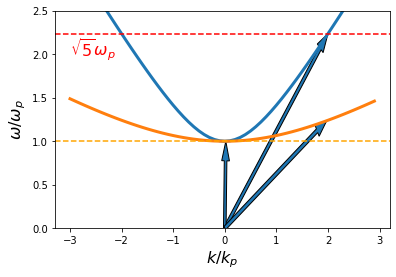

In [7]:
w0 = np.sqrt(1 + kp**2)
w1 = np.sqrt(1+3/2 * 0.3**2*kp**2)

plt.plot(kp,w0,linewidth=3)
plt.plot(kp,w1,linewidth=3)
plt.arrow(0,0,2.0,np.sqrt(5),length_includes_head=True,width=0.05)
plt.axhline(y=np.sqrt(5),color = 'r', linestyle = 'dashed' )
plt.axhline(y=1,color = 'orange', linestyle = 'dashed' )
plt.text(-3, np.sqrt(5)-0.25, '$\sqrt{5} \omega_p$', fontsize = 16, color='red')
plt.arrow(0,0,0.02,1.0,length_includes_head=True,width=0.05)
plt.arrow(0,0,1.98,1.24,length_includes_head=True,width=0.05)
plt.ylim([0,2.5])
plt.xlabel("$k/k_p$",fontsize = 16)
plt.ylabel("$\omega/\omega_p$",fontsize = 16)

#1c)

THe lowest frequencies for the plasmons is $\omega_1 = \omega_2 = \omega_p$

Thus 

$\omega_0 = \omega_1 + \omega_2 = 2\cdot \omega_p$

Is the lowest frequency possible for this decay instability. We convert the laser frequency to an equivalent critical density ($\omega_0 → n_c$), and also the plasma frequency to an equivalent plasma density ($\omega_p → n_e$) using $n = \epsilon_0 m \omega^2/e^2$:

$n_c = 4\cdot n_e → n_e = \frac{1}{4}n_c$





#1d)

For a 351 nm Laser we have for $\omega_0$

In [10]:
wlaser = 2*np.pi * c/351e-9

print("{:0.2e}".format(wlaser))

5.37e+15


Then the plasma density will have to be 1/4 the critical density or less:

In [14]:
ncrit = eps*m*wlaser**2 /q**2
print("Critical Density = {:0.2e} /m^3".format(ncrit))

Critical Density = 9.06e+27 /m^3


In [15]:
print("1/4 Critical Density = {:0.2e} /m^3".format(ncrit/4))

1/4 Critical Density = 2.27e+27 /m^3


Thus NIF laser will only see two-plasmon decay if the plasma target is has a density equal to or below $n_e = 2.27 \times 10^{27} m^{-3}$